
#Ex 1
Read lena.png and print the dimensions.
Read chair.png and print the dimensions.
Verify if you are getting 4 channels in chair.png
Plot the mask of the chair in the image chair.png




In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

(512, 512, 3)


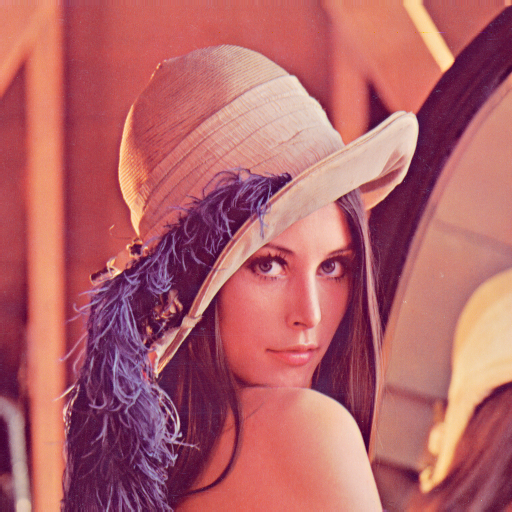

In [4]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')
print (I.shape)
cv2_imshow(I)

(137, 137, 3)


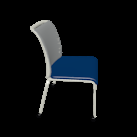

In [5]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png')
print (I.shape)
cv2_imshow(I)

(137, 137, 4)


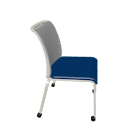

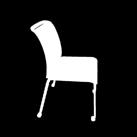

In [6]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])

uint8


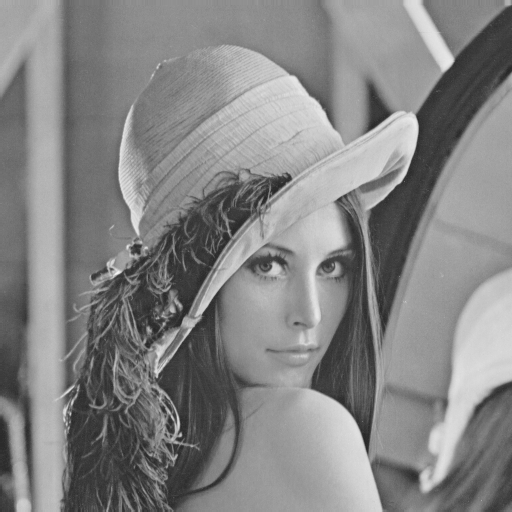

In [8]:
I_lena_bw = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
print (I_lena_bw.dtype)
cv2_imshow(I_lena_bw)
# counts,bins = np.histogram(I.ravel(),256,[0,256])
# bins = 0.5 * (bins[:-1] + bins[1:])
# fig = px.bar(x=bins, y=counts,labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
# fig.show()


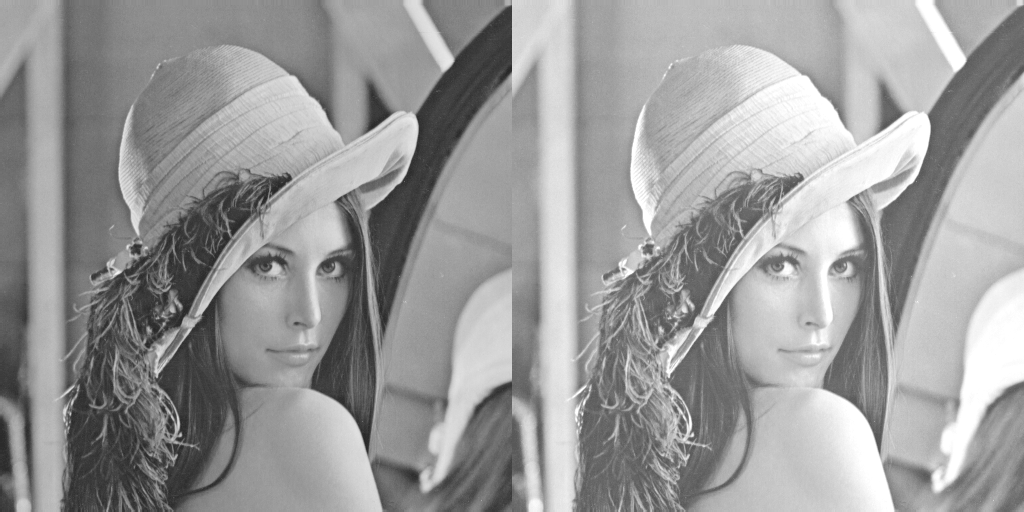

In [19]:
linear_shift = 45
I = I_lena_bw.astype('int')
lena_shifted = np.clip((I + linear_shift),0,255).astype('uint8')
cv2_imshow(np.hstack([I, lena_shifted]))


# HW:
Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. Use C = 1.


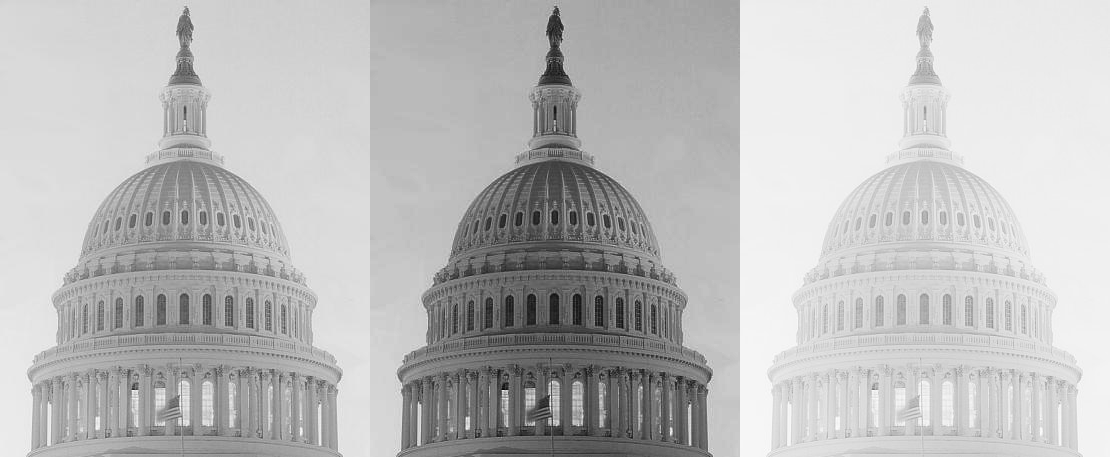

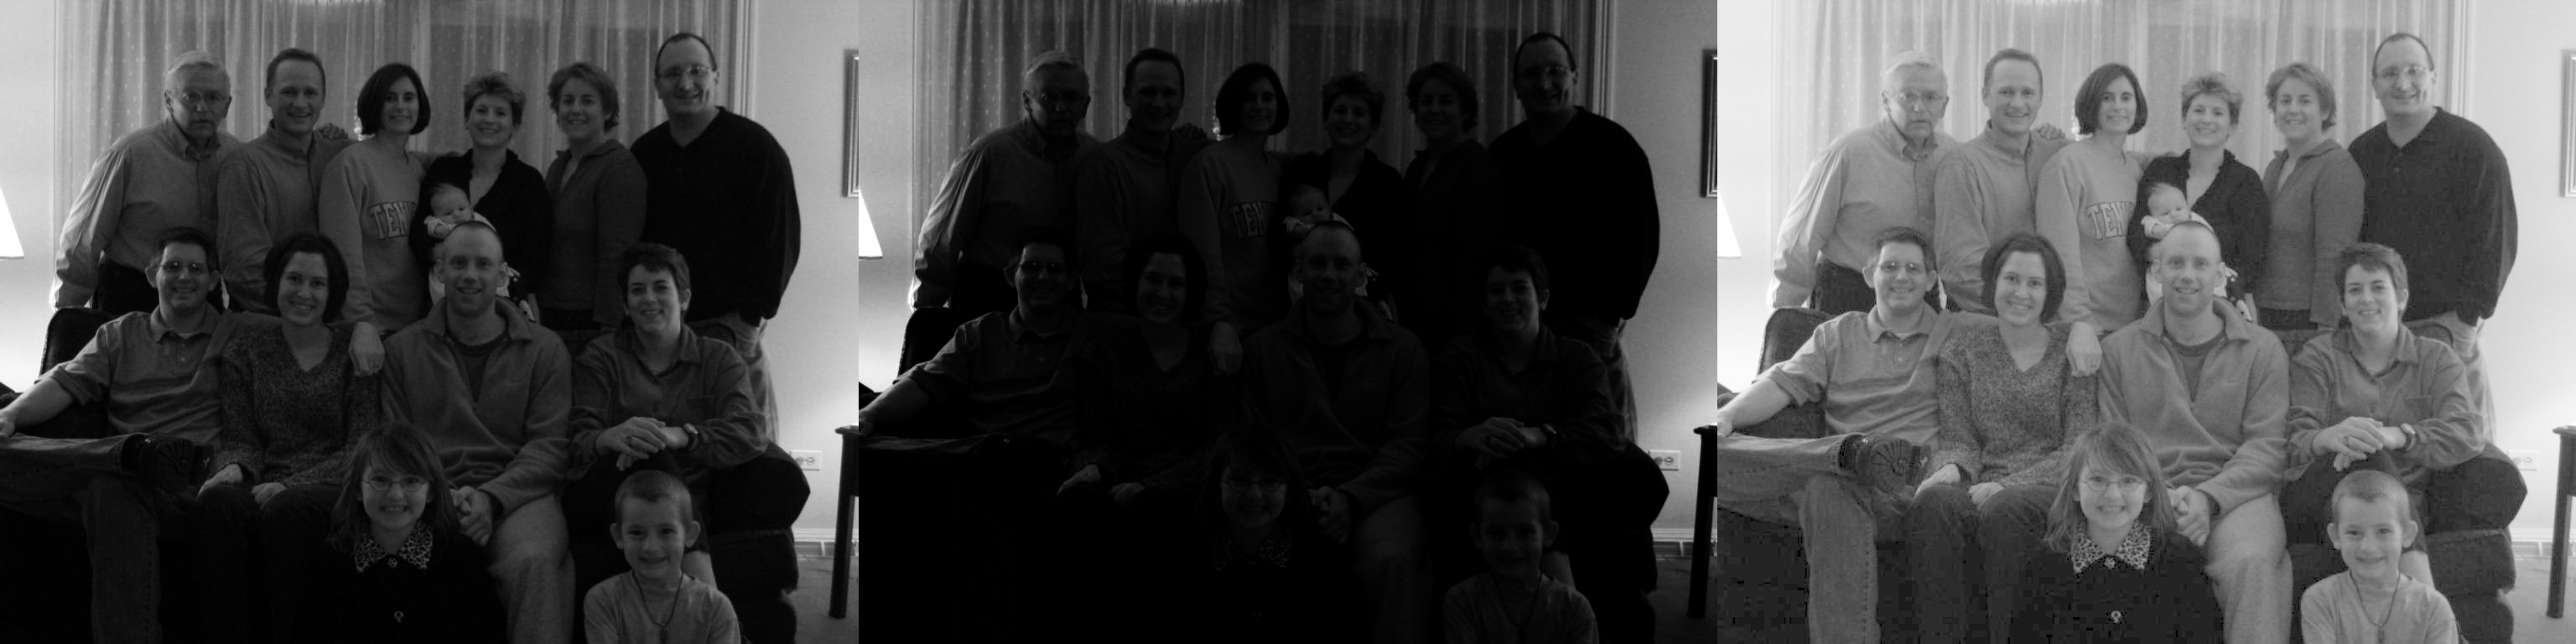

In [27]:

img = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg')
gamma1= np.array(255*(img/255)**2,dtype='uint8')
gamma2 = np.array(255*(img/255)**0.4,dtype='uint8')
img3 = cv2.hconcat([img,gamma1,gamma2])
cv2_imshow(img3)


img = cv2.imread('/content/drive/My Drive/Image Processing/gamma2.jpg')
gamma1= np.array(255*(img/255)**2,dtype='uint8')
gamma2 = np.array(255*(img/255)**0.4,dtype='uint8')
img3 = cv2.hconcat([img,gamma1,gamma2])
cv2_imshow(img3)


#Write a program to read and plot histogram for a grayscale image.


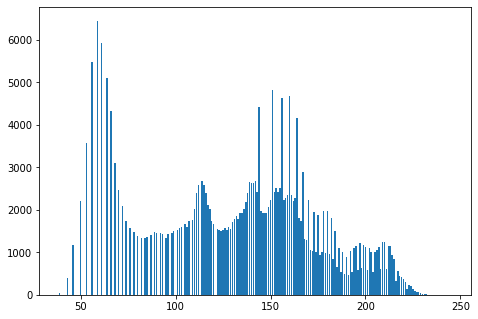

In [11]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
cnt={}
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i][j] in cnt.keys(): 
      cnt[I[i][j]]+=1
    else:
      cnt[I[i][j]]=0

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cnt.keys(),cnt.values())
plt.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.show()

#Plot histogram for RGB images ‘lotus.jpg’. You can use inbuilt functions for that. All RGB channels should be plotted in the same curve as shown below:


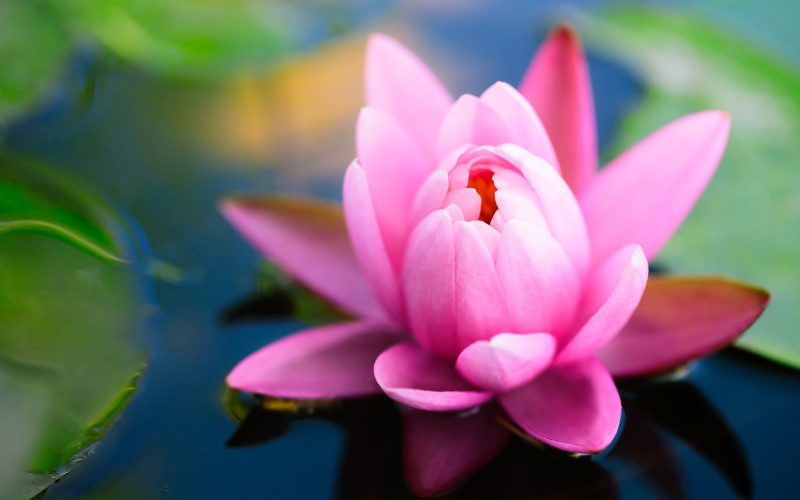

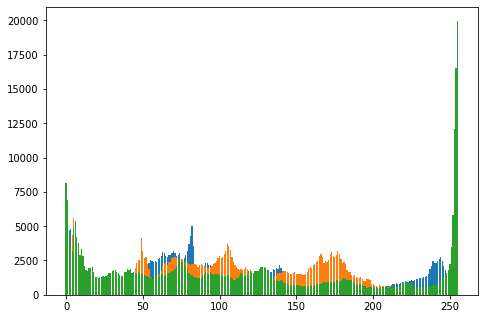

In [51]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')
cv2_imshow(I)
cnt1={}
cnt2={}
cnt3={}
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i][j][0] in cnt1.keys(): 
      cnt1[I[i][j][0]]+=1
    else:
      cnt1[I[i][j][0]]=0
    if I[i][j][1] in cnt2.keys(): 
      cnt2[I[i][j][1]]+=1
    else:
      cnt2[I[i][j][1]]=0
    if I[i][j][2] in cnt3.keys(): 
      cnt3[I[i][j][2]]+=1
    else:
      cnt3[I[i][j][2]]=0   

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cnt1.keys(),cnt1.values())
ax.bar(cnt2.keys(),cnt2.values())
ax.bar(cnt3.keys(),cnt3.values())
plt.show()



#Thresholding

#Perform simple thresholding on the image ‘FingerPrint.jpg’. Plot the histogram and observe the threshold value. You can use an inbuilt function for thresholding.


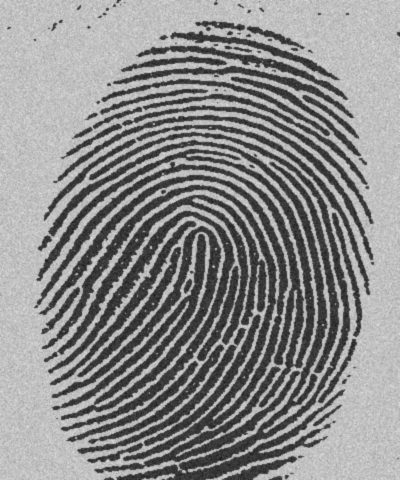

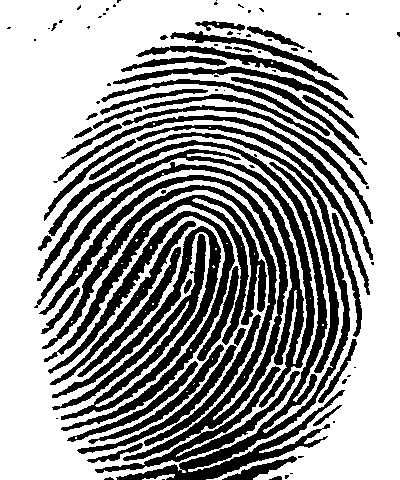

In [28]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i][j]<125 : 
      I[i][j]=0
    else:
      I[i][j]=255
    # print(I[i][j])
cv2_imshow(I)
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.show()

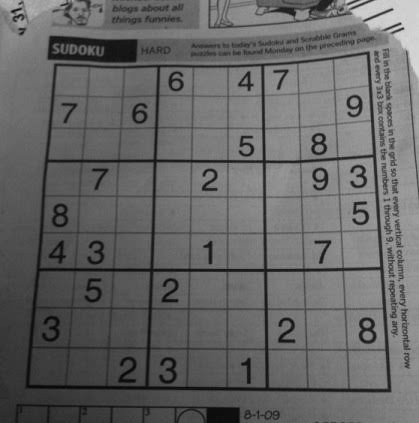

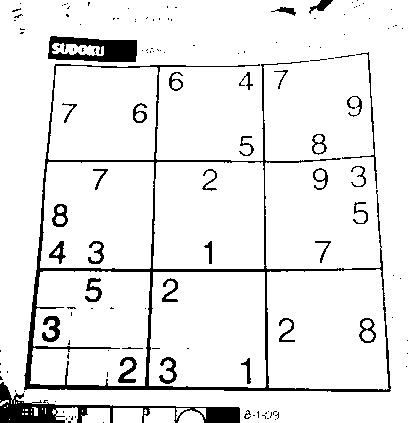

In [29]:
I = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.show()
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i][j]<50 : 
      I[i][j]=0
    else:
      I[i][j]=255
    # print(I[i][j])
cv2_imshow(I)


#EX 5
Write a function which takes an image section and filter as an input and gives the convolution output. Take the filter to be- np.array([[1,1,1],[1,1,1],[1,1,1]])/9

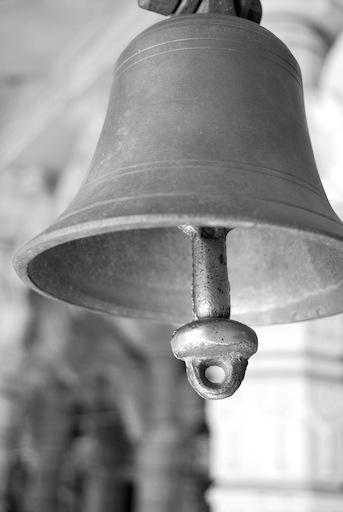

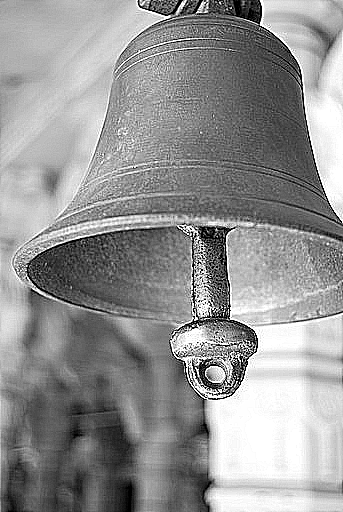

In [30]:
def convo(I, H):
  I_new=I
  for x in range(1, I.shape[0]-1):
    for y in range(1, I.shape[1]-1):
      for i in range(-int(H.shape[0]/2), int(H.shape[0]/2)+1):
        for j in range(int(-H.shape[1]/2), int(H.shape[1]/2)+1):
          I_new[x][y]+=int(I[x+i][y+j]*H[i+int(H.shape[0]/2)][j+int(H.shape[1]/2)])
  return I_new
I = cv2.imread('/content/drive/My Drive/Image Processing/bell.jpg', cv2.IMREAD_GRAYSCALE)
H=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

cv2_imshow(I)
# I=convo(I,H)

# kernel = np.ones((5,5),np.float32)/25
I= cv2.filter2D(I,-1,H)

cv2_imshow(I)
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.show()


#Ex 6:
Count the number of windows in image 'window.jpeg' using edge detection filters.
*italicized text*

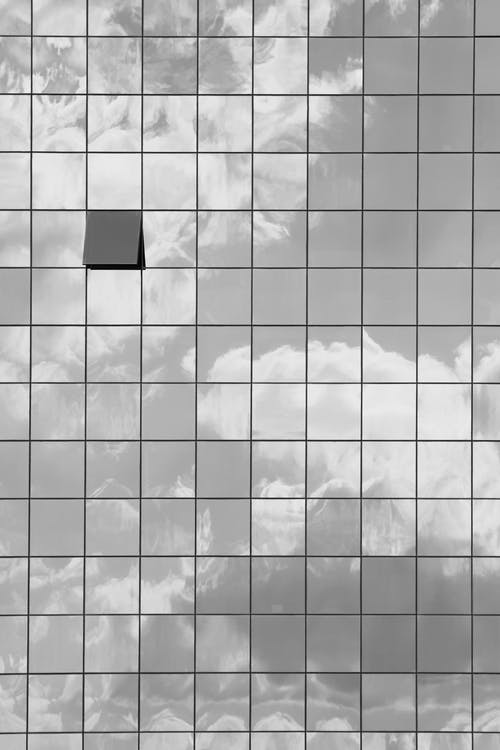

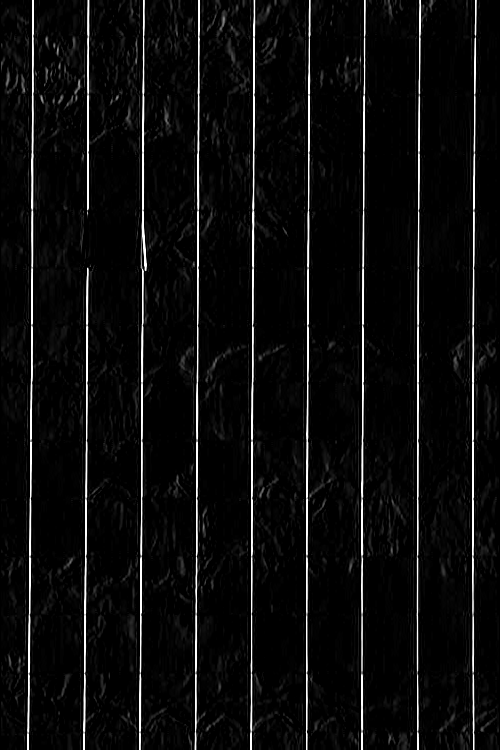

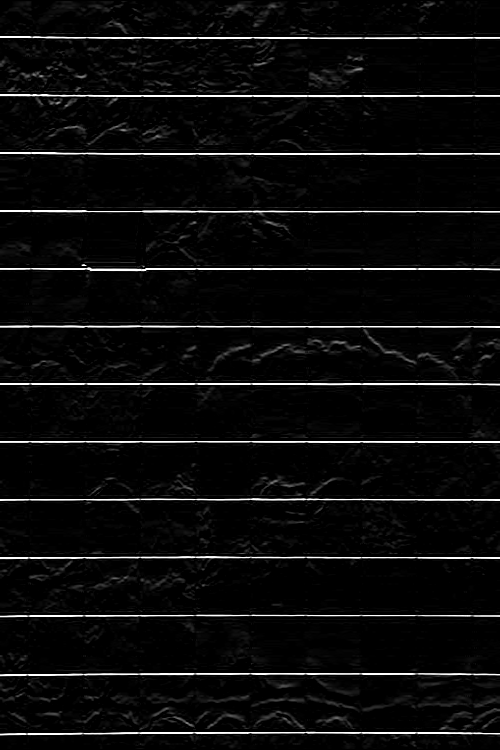

TOTAL WINDOWS


140

In [13]:
I = cv2.imread('/content/drive/My Drive/Image Processing/window.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
H=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
I1= cv2.filter2D(I,-1,H)
cv2_imshow(I1)
H=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
I2= cv2.filter2D(I,-1,H)

# I2=np.where(I2<100, 0, 255)
cv2_imshow(I2)

# fig = go.Figure()
# fig.add_trace(go.Histogram(x=I2.ravel(), name= 'Original Image'))
# fig.show()
I2[0:]
cnt=0
for i in range(I2.shape[0]):

  if I2[i][0]==255 and f==0:
    cnt+=1
    f=1
  if I2[i][0]==0:
    f=0

cnt2=0
for i in range(I1.shape[1]):

  if I1[0][i]==255 and f==0:
    cnt2+=1
    f=1
  if I1[0][i]==0:
    f=0


cnt2
ans=(cnt+1)*(cnt2+1)
print("TOTAL WINDOWS")
ans



# Q3 Perform thresholding on the image ‘text.jpg’



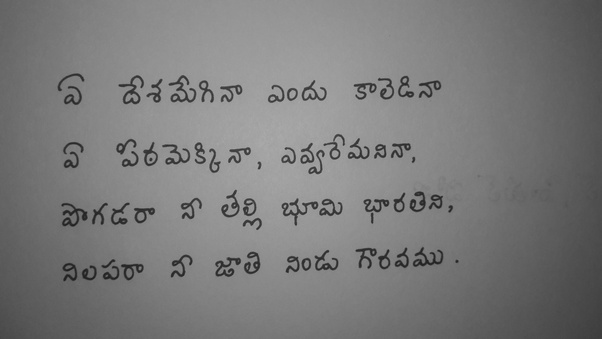

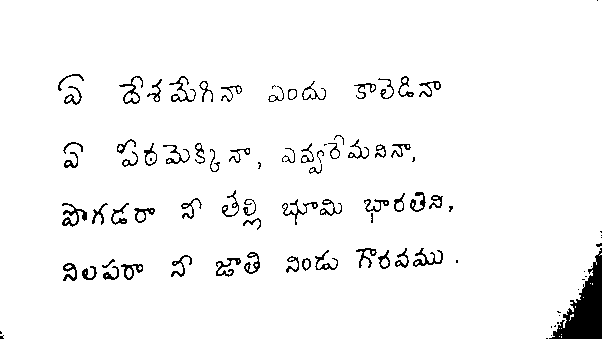

In [41]:
I = cv2.imread('/content/drive/My Drive/Image Processing/text.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i][j]<75 : 
      I[i][j]=0
    else:
      I[i][j]=255
cv2_imshow(I)
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.show()